In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv("./train.csv")
dft=pd.read_csv("./test.csv")
print(df.shape)

(100, 6)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
label    100 non-null int64
f1       100 non-null float64
f2       100 non-null float64
f3       100 non-null float64
f4       100 non-null float64
f5       100 non-null float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [3]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
label    100 non-null int64
f1       100 non-null float64
f2       100 non-null float64
f3       100 non-null float64
f4       100 non-null float64
f5       100 non-null float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [9]:
# # Describe the dataset
dft.head()

,label,f1,f2,f3,f4,f5
0,1,0.906894,-0.934794,-0.659271,-0.742932,-0.547610
1,1,-0.421848,0.890526,-0.938967,-0.708619,-0.631167
2,1,0.343360,0.565961,0.929922,-0.724281,-0.139706
3,1,-0.430049,0.866145,-0.925501,-0.708795,-0.585203
4,1,0.350361,0.572289,0.926527,-0.188025,-0.719044


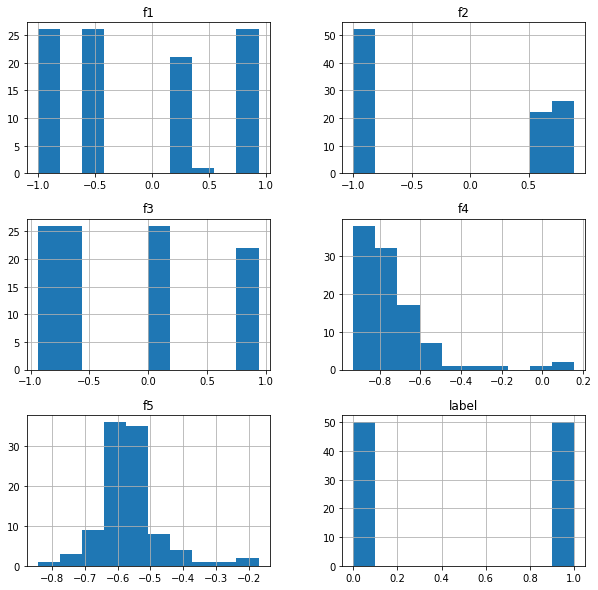

In [6]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

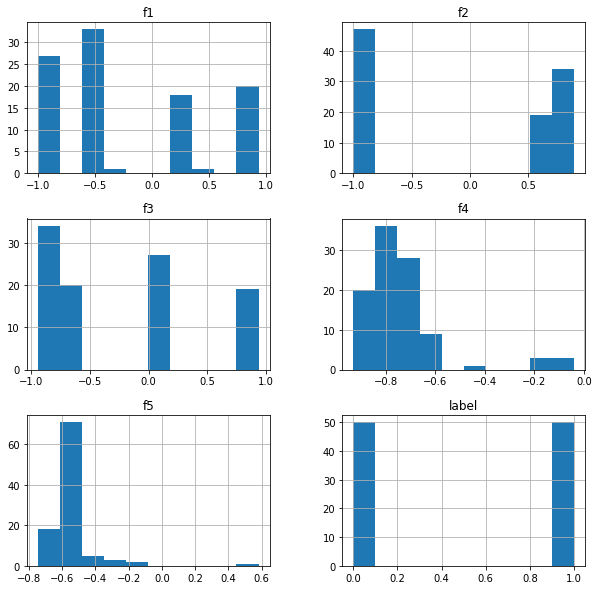

In [7]:
# Plot histograms for each variable
dft.hist(figsize = (10, 10))
plt.show()

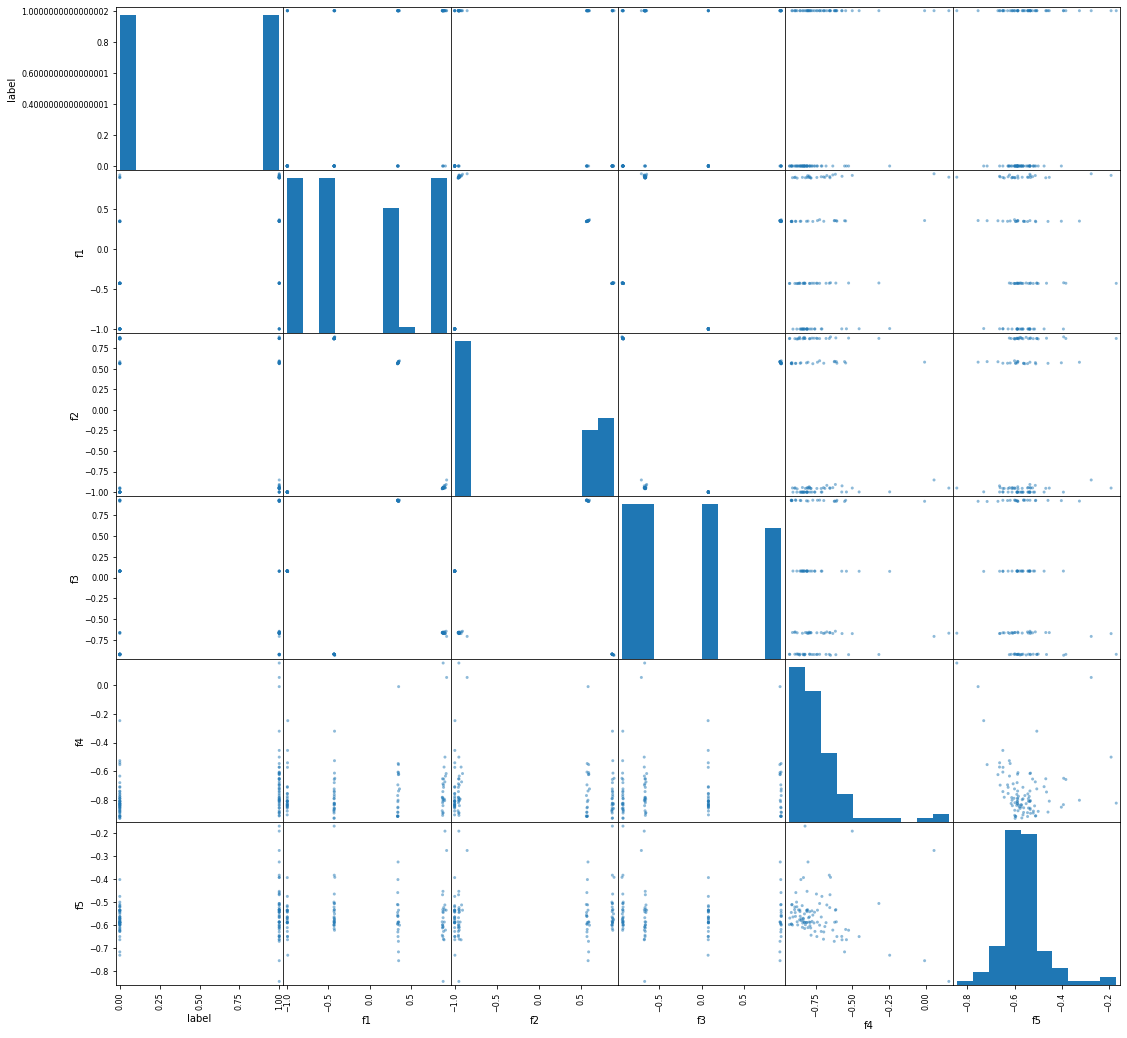

In [8]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

In [8]:
# Create X and Y datasets for training
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
X_train= X
y_train= y
X_test= dft.iloc[:, 1:].values
y_test= dft.iloc[:, 0].values

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
import keras
print(keras.__version__)

2.2.4


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
# import keras
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(128, input_dim=5))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('softmax'))
# model.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
model.add(Dense(1,kernel_initializer='uniform',activation= 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Train on 100 samples, validate on 100 samples
Epoch 1/20
100/100 [==============================] - 2s 25ms/sample - loss: 0.6929 - accuracy: 0.5600 - val_loss: 0.6930 - val_accuracy: 0.4900
Epoch 2/20
100/100 [==============================] - 0s 760us/sample - loss: 0.6916 - accuracy: 0.6500 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/20
100/100 [==============================] - 0s 920us/sample - loss: 0.6909 - accuracy: 0.6600 - val_loss: 0.6927 - val_accuracy: 0.5500
Epoch 4/20
100/100 [==============================] - 0s 880us/sample - loss: 0.6899 - accuracy: 0.8100 - val_loss: 0.6926 - val_accuracy: 0.5700
Epoch 5/20
100/100 [==============================] - 0s 800us/sample - loss: 0.6888 - accuracy: 0.8200 - val_loss: 0.6925 - val_accuracy: 0.6300
Epoch 6/20
100/100 [==============================] - 0s 720us/sample - loss: 0.6878 - accuracy: 0.8300 - val_loss: 0.6923 - val_accuracy: 0.5800
Epoch 7/20
100/100 [==============================] - 0s 720us/sample - loss: 0

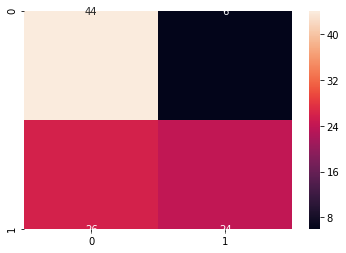

In [36]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

**Detection with ML**

In [37]:
# Testing Options
seed = 8
scoring = 'accuracy'

# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.740000 (0.128062)
SVM: 0.790000 (0.137477)


C:\Users\Darkmask\Anaconda3\envs\tensor_gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Darkmask\Anaconda3\envs\tensor_gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [38]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 

KNN
0.69
              precision    recall  f1-score   support

         0.0       0.66      0.78      0.72        50
         1.0       0.73      0.60      0.66        50

    accuracy                           0.69       100
   macro avg       0.70      0.69      0.69       100
weighted avg       0.70      0.69      0.69       100

SVM
0.71
              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72        50
         1.0       0.73      0.66      0.69        50

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100



In [39]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.71
